In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [5]:
raw_data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [15]:
df = raw_data.loc[( (raw_data.year==6) | (raw_data.year==7) )].dropna()

In [16]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8147 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8147 non-null object
idno       8147 non-null float64
year       8147 non-null int64
tvtot      8147 non-null float64
ppltrst    8147 non-null float64
pplfair    8147 non-null float64
pplhlp     8147 non-null float64
happy      8147 non-null float64
sclmeet    8147 non-null float64
sclact     8147 non-null float64
gndr       8147 non-null float64
agea       8147 non-null float64
partner    8147 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 891.1+ KB


In [14]:
df['year'].value_counts()

7    4076
6    4071
Name: year, dtype: int64

In [18]:
df['cntry'].value_counts()

ES    2292
SE    1726
CH    1475
NO    1420
CZ    1207
DE      27
Name: cntry, dtype: int64

In [30]:
df_2012 = df.loc[(df.year == 6)]
df_2014 = df.loc[(df.year == 7)]

In [42]:
trust_changes = pd.DataFrame()

In [45]:
trust_changes['2012'] = df_2012.groupby('cntry')['ppltrst'].mean()
trust_changes['2014'] = df_2014.groupby('cntry')['ppltrst'].mean()
trust_changes['difference'] = trust_changes['2014'] - trust_changes['2012']

In [46]:
trust_changes

,2012,2014,difference
cntry,,,
CH,5.685792,5.764468,0.078676
CZ,4.402662,4.356436,-0.046227
DE,5.076923,5.357143,0.280220
ES,5.127807,4.940035,-0.187771
NO,6.648305,6.599719,-0.048586
SE,6.043073,6.239908,0.196834


In [47]:
happiness_changes = pd.DataFrame()

In [48]:
happiness_changes['2012'] = df_2012.groupby('cntry')['happy'].mean()
happiness_changes['2014'] = df_2014.groupby('cntry')['happy'].mean()
happiness_changes['difference'] = happiness_changes['2014'] - happiness_changes['2012']

In [49]:
happiness_changes

,2012,2014,difference
cntry,,,
CH,8.083333,8.142665,0.059332
CZ,6.790349,6.922442,0.132093
DE,7.307692,7.857143,0.549451
ES,7.557858,7.450617,-0.107241
NO,8.252825,7.919944,-0.332881
SE,7.901048,7.938870,0.037822


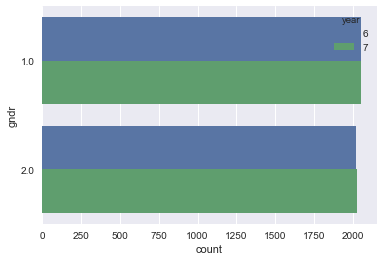

In [78]:
sns.countplot(y='gndr', data=df, hue='year')

## Tv Time

In [72]:
# 1 = male
# 2 = female
df_2012.groupby('gndr')['tvtot'].sum()

gndr
1.0    7923.0
2.0    7881.0
Name: tvtot, dtype: float64

In [68]:
df_2012.groupby('gndr')['tvtot'].mean()

gndr
1.0    3.859230
2.0    3.905352
Name: tvtot, dtype: float64

## Trust

In [71]:
# 1 lives with partner
# does not live with partner
df_2012.groupby('partner')['ppltrst'].mean()

partner
1.0    5.664044
2.0    5.436233
Name: ppltrst, dtype: float64

## Comparing Social Meetings

In [79]:
# CH = switzerland
# NO = Norway
# CZ= Czech Republic

df_social = df_2014.loc[( (df_2014['cntry'] == 'CH') | 
                          (df_2014['cntry'] == 'NO') | 
                          (df_2014['cntry'] == 'CZ')
                        )]

In [81]:
df_social['cntry'].value_counts()

CH    743
NO    712
CZ    606
Name: cntry, dtype: int64

In [108]:
df_social.groupby('cntry')['sclmeet'].mean()

cntry
CH    5.174966
CZ    4.495050
NO    5.310393
Name: sclmeet, dtype: float64

In [110]:
df_social_meet = df_social[['cntry', 'sclmeet']]

In [116]:
import scipy.stats as stats

In [122]:
ch_scl = df_social_meet[df_social_meet['cntry']=='CH']['sclmeet']
cz_scl = df_social_meet[df_social_meet['cntry']=='CZ']['sclmeet']
no_scl = df_social_meet[df_social_meet['cntry']=='NO']['sclmeet']

In [123]:
F, p = stats.f_oneway(
    ch_scl,
    cz_scl,
    no_scl
)

In [124]:
print(F)

65.428952086


In [125]:
print(p)

2.82753261763e-28


In [127]:
print(stats.ttest_ind(ch_scl, cz_scl))
print(stats.ttest_ind(ch_scl, no_scl))
print(stats.ttest_ind(no_scl, cz_scl))

Ttest_indResult(statistic=8.9985688881021577, pvalue=7.5869400091321204e-19)
Ttest_indResult(statistic=-1.9524600649137105, pvalue=0.051075410049466891)
Ttest_indResult(statistic=10.507796823715257, pvalue=7.4270211343070741e-25)


## Comparing Social Activities

In [130]:
df_social_age = df_social[['cntry', 'sclact', 'agea']]

In [131]:
df_social_age.head()

,cntry,sclact,agea
773,CH,4.0,69.0
774,CH,3.0,30.0
775,CH,5.0,49.0
776,CH,2.0,51.0
777,CH,2.0,32.0


(array([ 269.,  202.,  260.,  333.,  307.,  274.,  217.,  129.,   56.,   14.]),
 array([ 15. ,  22.9,  30.8,  38.7,  46.6,  54.5,  62.4,  70.3,  78.2,
         86.1,  94. ]),
 <a list of 10 Patch objects>)

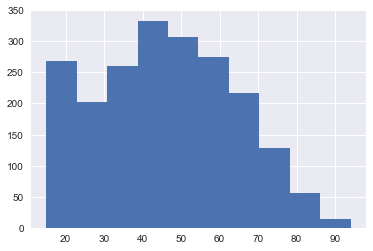

In [132]:
plt.hist(df_social_age['agea'])

In [155]:
ch_below_35 = df_social_age.loc[(
    (df_social_age['cntry'] == 'CH') &
    (df_social_age['agea'] <= 35)
)]['sclact']

no_below_35 = df_social_age.loc[(
    (df_social_age['cntry'] == 'NO') &
    (df_social_age['agea'] <= 35)
)]['sclact']

cz_below_35 = df_social_age.loc[(
    (df_social_age['cntry'] == 'CZ') &
    (df_social_age['agea'] <= 35)
)]['sclact']

In [156]:
F, p = stats.f_oneway(
    ch_below_35,
    cz_below_35,
    no_below_35
)

In [157]:
print(F)

1.32186298214


In [158]:
print(p)

0.267374249472


In [159]:
print(stats.ttest_ind(ch_below_35, cz_below_35))
print(stats.ttest_ind(ch_below_35, no_below_35))
print(stats.ttest_ind(no_below_35, cz_below_35))

Ttest_indResult(statistic=-0.7403581372263508, pvalue=0.45949344719231022)
Ttest_indResult(statistic=-1.598918099374715, pvalue=0.11053755041932031)
Ttest_indResult(statistic=0.8124806723436141, pvalue=0.41701281007001345)
